In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings

# suppress the specific FutureWarning about 'use_inf_as_na'
warnings.filterwarnings('ignore', message = '.*use_inf_as_na.*', category = FutureWarning)
warnings.filterwarnings('ignore', message = '.*get_group.*', category = FutureWarning)

In [3]:
# set theme for plotting
sns.set_theme(style = "darkgrid")

In [4]:
taxi_df = pd.read_csv('/kaggle/input/yellow-taxi-trip-data-2017/C2_2017_Yellow_Taxi_Trip_Data.csv')
zone_df = pd.read_csv('/kaggle/input/taxi-zones/taxi_zone_lookup.csv')

In [5]:
taxi_df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
zone_df.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

In [7]:
taxi_df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
zone_df.isnull().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [9]:
taxi_df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [10]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [11]:
df = taxi_df.merge(zone_df, how = 'left', left_on = 'PULocationID', right_on = 'LocationID')
df[['Borough', 'Zone']] = df[['Borough', 'Zone']].fillna('Not available')
df = df.rename(columns = {'Borough': 'PU_borough', 'Zone': 'PU_zone'}).drop(columns = ['LocationID', 'service_zone'])

In [12]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PU_borough,PU_zone
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Manhattan,Garment District
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Manhattan,Penn Station/Madison Sq West
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Manhattan,Yorkville East
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,Brooklyn,Prospect-Lefferts Gardens
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Manhattan,Alphabet City


In [13]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
PU_borough               0
PU_zone                  0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,NaN,NaN,NaN,56758486.171285,32744929.492148,12127.0,28520556.0,56731504.0,85374524.0,113486300.0
VendorID,22699.0,NaN,NaN,NaN,1.556236,0.496838,1.0,1.0,2.0,2.0,2.0
tpep_pickup_datetime,22699,22687,07/03/2017 3:45:19 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,22699,22688,10/18/2017 8:07:45 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,22699.0,NaN,NaN,NaN,1.642319,1.285231,0.0,1.0,1.0,2.0,6.0
trip_distance,22699.0,NaN,NaN,NaN,2.913313,3.653171,0.0,0.99,1.61,3.06,33.96
RatecodeID,22699.0,NaN,NaN,NaN,1.043394,0.708391,1.0,1.0,1.0,1.0,99.0
store_and_fwd_flag,22699,2,N,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,22699.0,NaN,NaN,NaN,162.412353,66.633373,1.0,114.0,162.0,233.0,265.0
DOLocationID,22699.0,NaN,NaN,NaN,161.527997,70.139691,1.0,112.0,162.0,233.0,265.0


## Feature Engineering

In [16]:
# convert date columns into datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [17]:
# create new features
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day'] = df['tpep_pickup_datetime'].dt.weekday + 1
df['month'] = df['tpep_pickup_datetime'].dt.month

In [18]:
day_order = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

month_order = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [19]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PU_borough,PU_zone,hour,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,Manhattan,Garment District,8,6,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,Manhattan,Penn Station/Madison Sq West,14,2,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,Manhattan,Yorkville East,7,5,12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,Brooklyn,Prospect-Lefferts Gardens,13,7,5
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,Manhattan,Alphabet City,23,6,4


## Trip count by distance and revenue

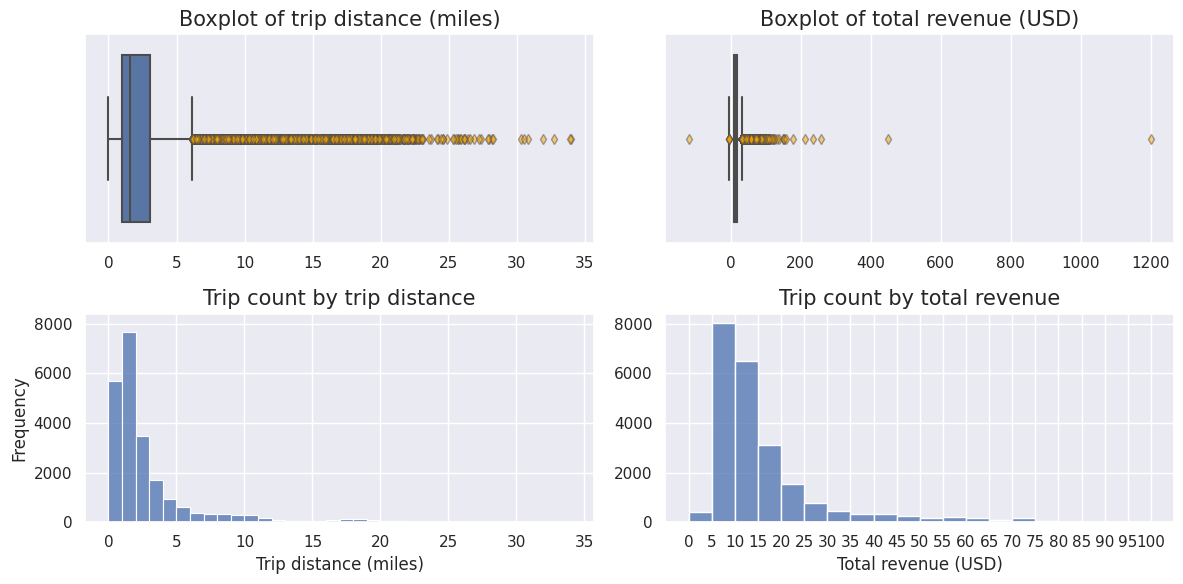

In [20]:
# create plots layout
fig = plt.figure(figsize = (12, 6))
ax1 = plt.subplot2grid((2, 2),(0, 0))
ax2 = plt.subplot2grid((2, 2),(0, 1))
ax3 = plt.subplot2grid((2, 2),(1, 0))
ax4 = plt.subplot2grid((2, 2),(1, 1), sharey = ax3)

# trip distance
sns.boxplot(data = df, x = 'trip_distance', flierprops = dict(markerfacecolor = 'orange', linewidth = 0, alpha = 0.5), ax = ax1)
ax1.set_title('Boxplot of trip distance (miles)', fontsize = 15)
ax1.set_xlabel('')

sns.histplot(df['trip_distance'], bins = range(0, 35, 1), ax = ax3)
ax3.set_title('Trip count by trip distance', fontsize = 15)
ax3.set_xlabel('Trip distance (miles)')
ax3.set_ylabel('Frequency')

# total amount
sns.boxplot(data = df, x = 'total_amount', flierprops = dict(markerfacecolor = 'orange', linewidth = 0, alpha = 0.5), ax = ax2)
ax2.set_title('Boxplot of total revenue (USD)', fontsize = 15)
ax2.set_xlabel('')

sns.histplot(df['total_amount'], bins = range(0, 105, 5), ax = ax4)
ax4.set_title('Trip count by total revenue', fontsize = 15)
ax4.set_xticks(range(0, 105, 5))
ax4.set_xlabel('Total revenue (USD)')
ax4.set_ylabel('')


fig.tight_layout()
plt.show();

In [21]:
# zero trip_distance or total_amount
df[(df['trip_distance'] == 0) | (df['total_amount'] == 0)].sort_values(by = 'trip_distance')[['VendorID', 'RatecodeID', 'PULocationID', 
                                                                                              'tpep_pickup_datetime', 'passenger_count',
                                                                                              'payment_type', 'trip_distance',
                                                                                              'fare_amount', 'total_amount']]

,VendorID,RatecodeID,PULocationID,tpep_pickup_datetime,passenger_count,payment_type,trip_distance,fare_amount,total_amount
128,1,3,231,2017-06-22 08:05:33,1,2,0.00,20.0,20.30
13827,1,1,238,2017-01-20 08:40:05,1,1,0.00,2.5,3.95
13970,2,5,7,2017-02-23 09:21:25,1,2,0.00,1.0,1.30
14062,1,1,113,2017-03-30 19:56:31,3,2,0.00,2.5,3.80
14165,2,5,68,2017-10-29 01:14:35,1,1,0.00,4.8,6.62
...,...,...,...,...,...,...,...,...,...
6878,2,5,100,2017-08-17 04:06:26,4,1,0.00,98.5,99.30
6908,2,5,61,2017-03-26 02:07:08,1,1,0.00,18.0,20.30
5722,2,1,264,2017-06-12 12:08:55,1,1,0.00,0.0,0.00
22670,1,1,132,2017-03-03 23:09:16,1,3,0.00,2.5,3.80


**Trip distance**
* Majority of the trips are below 3 miles
* Surprisingly, there are fare charged for trips with zero distance
* Not much of a concern for the higher distances as a borough-to-borough ride across the city or rides includes airports could easily make up to distance over 30 miles

**Total revenue**
* Most of the trips cost \\$5 to \\$20
* Surpisingly, there are trips with negative amount (-\\$120.30) and extremely high amount (\\$1200.29)

## Peak pick-up zones and Top revenue by zone

In [22]:
top_trips = (
    df.groupby(['PU_zone', 'PU_borough'])
    .size()
    .reset_index(name = 'trip_count')
    .sort_values('trip_count', ascending = False)
    .head(50)
)

top_trips.head()

,PU_zone,PU_borough,trip_count
135,Upper East Side South,Manhattan,890
89,Midtown Center,Manhattan,861
105,Penn Station/Madison Sq West,Manhattan,792
134,Upper East Side North,Manhattan,785
90,Midtown East,Manhattan,779


In [23]:
top_revenue = (
    df.groupby(['PU_zone', 'PU_borough'])['total_amount']
    .sum()
    .reset_index(name = 'total_revenue')
    .sort_values('total_revenue', ascending = False)
    .head(50)
)

top_revenue.head()

,PU_zone,PU_borough,total_revenue
66,JFK Airport,Queens,29257.78
74,LaGuardia Airport,Queens,26918.39
89,Midtown Center,Manhattan,12753.76
105,Penn Station/Madison Sq West,Manhattan,11688.95
90,Midtown East,Manhattan,11400.89


In [24]:
top_trips['PU_borough'].value_counts()

PU_borough
Manhattan    47
Queens        2
Unknown       1
Name: count, dtype: int64

In [25]:
top_revenue['PU_borough'].value_counts()

PU_borough
Manhattan    46
Queens        3
Unknown       1
Name: count, dtype: int64

In [26]:
borough_color = {
    'Manhattan': '#2ca02c',
    'Queens': '#d62728',
    'Unknown': '#919496',
}

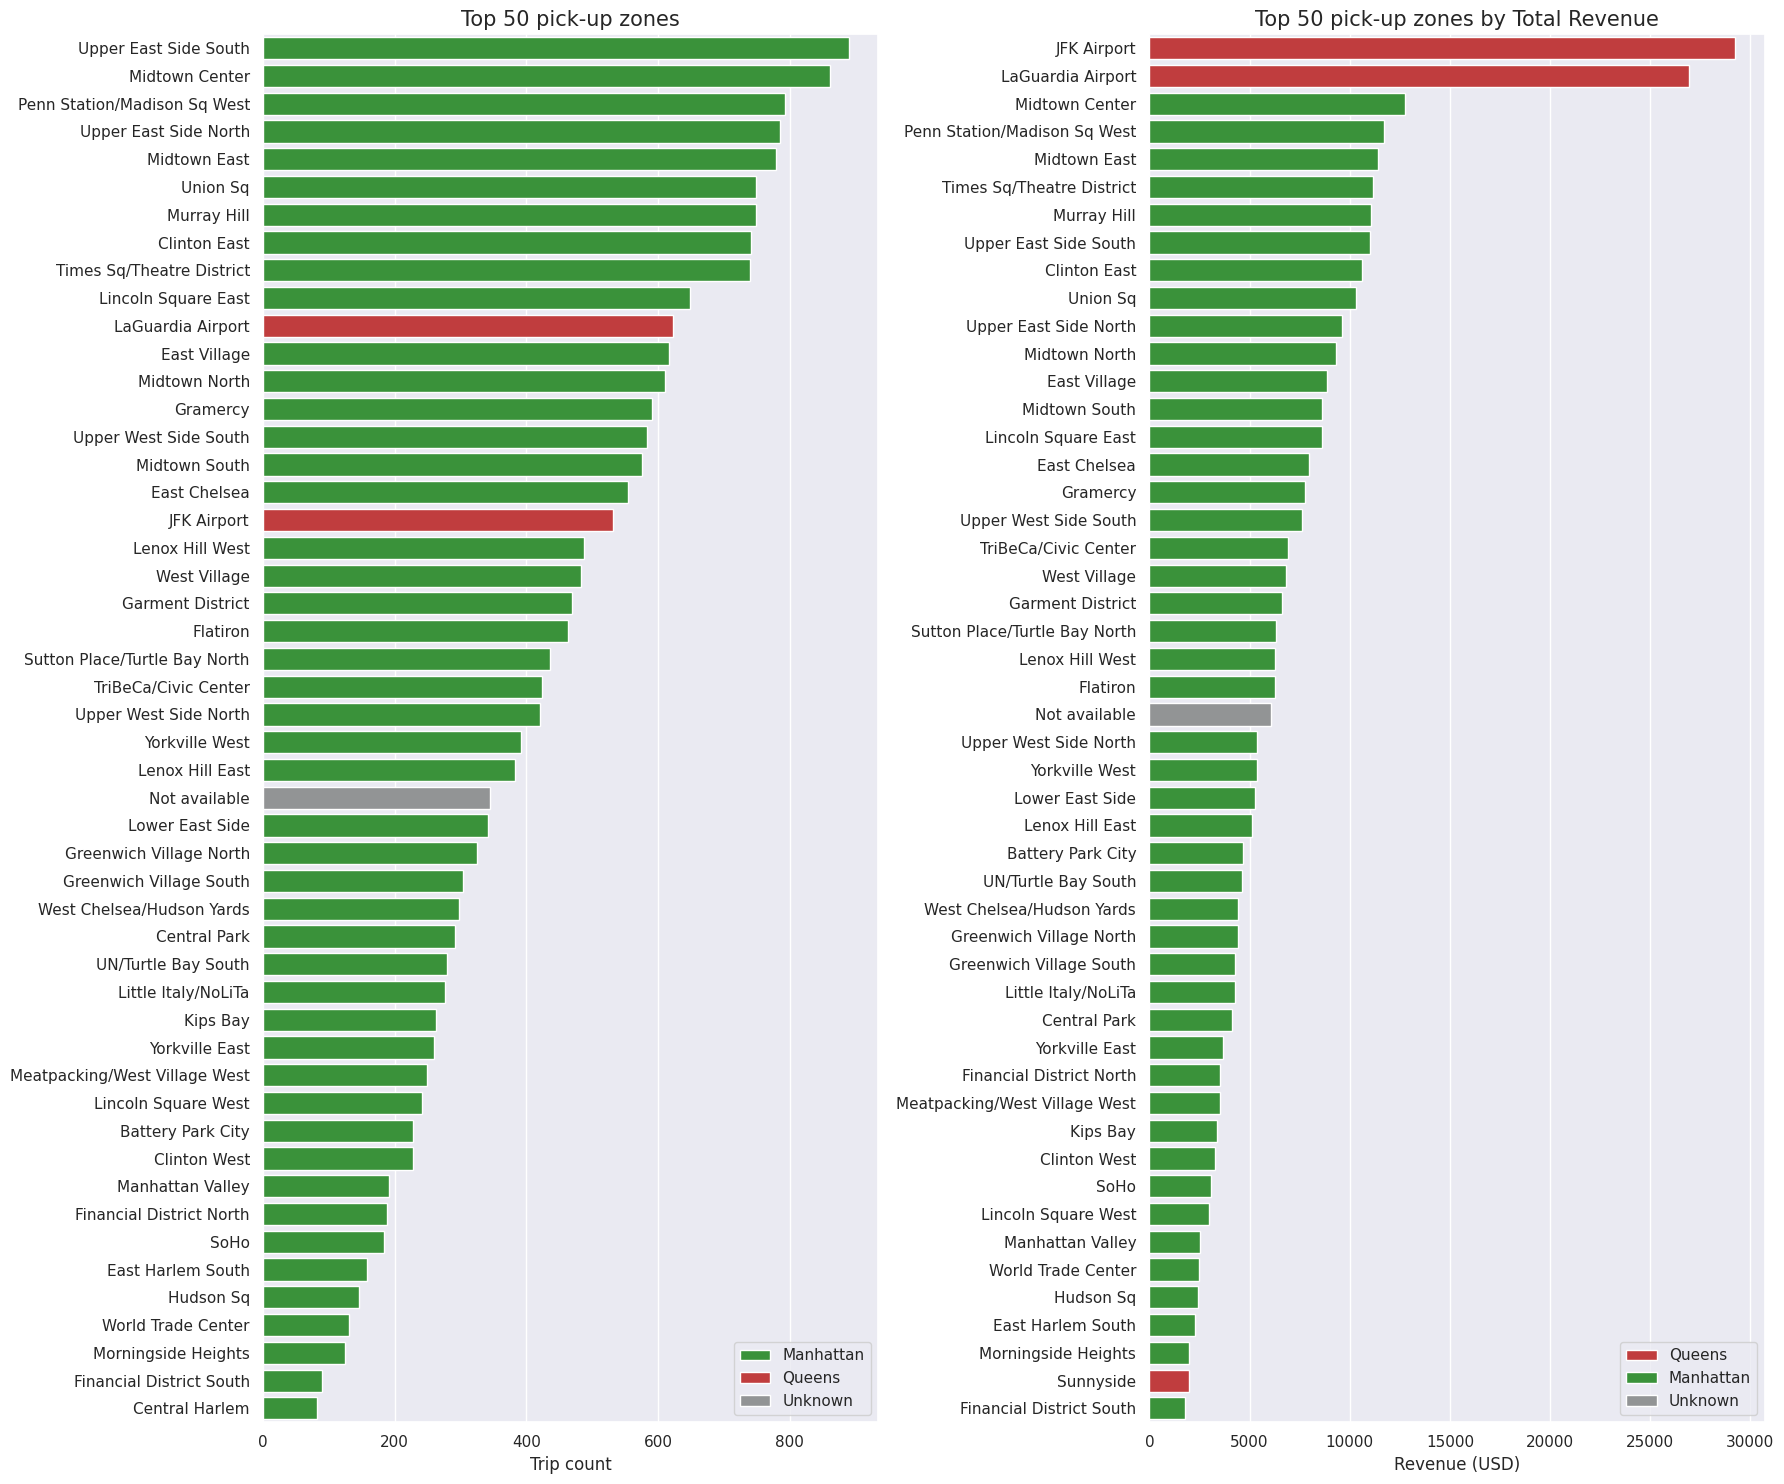

In [27]:
fig = plt.figure(figsize = (18, 15))
ax1 = plt.subplot2grid((1, 2),(0, 0))
ax2 = plt.subplot2grid((1, 2),(0, 1))

# peak zones
sns.barplot(data = top_trips, x = 'trip_count', y = 'PU_zone', hue = 'PU_borough', dodge = False, palette = borough_color, ax = ax1)
ax1.set_title('Top 50 pick-up zones', fontsize = 15)
ax1.set_xlabel('Trip count')
ax1.set_ylabel('')
ax1.legend(title = '')

# top revenue by zone
sns.barplot(data = top_revenue, x = 'total_revenue', y = 'PU_zone', hue = 'PU_borough', dodge = False, palette = borough_color, ax = ax2)
ax2.set_title('Top 50 pick-up zones by Total Revenue', fontsize = 15)
ax2.set_xlabel('Revenue (USD)')
ax2.set_ylabel('')
ax2.legend(title = '')


fig.tight_layout()
plt.show();

## Trip count and revenue

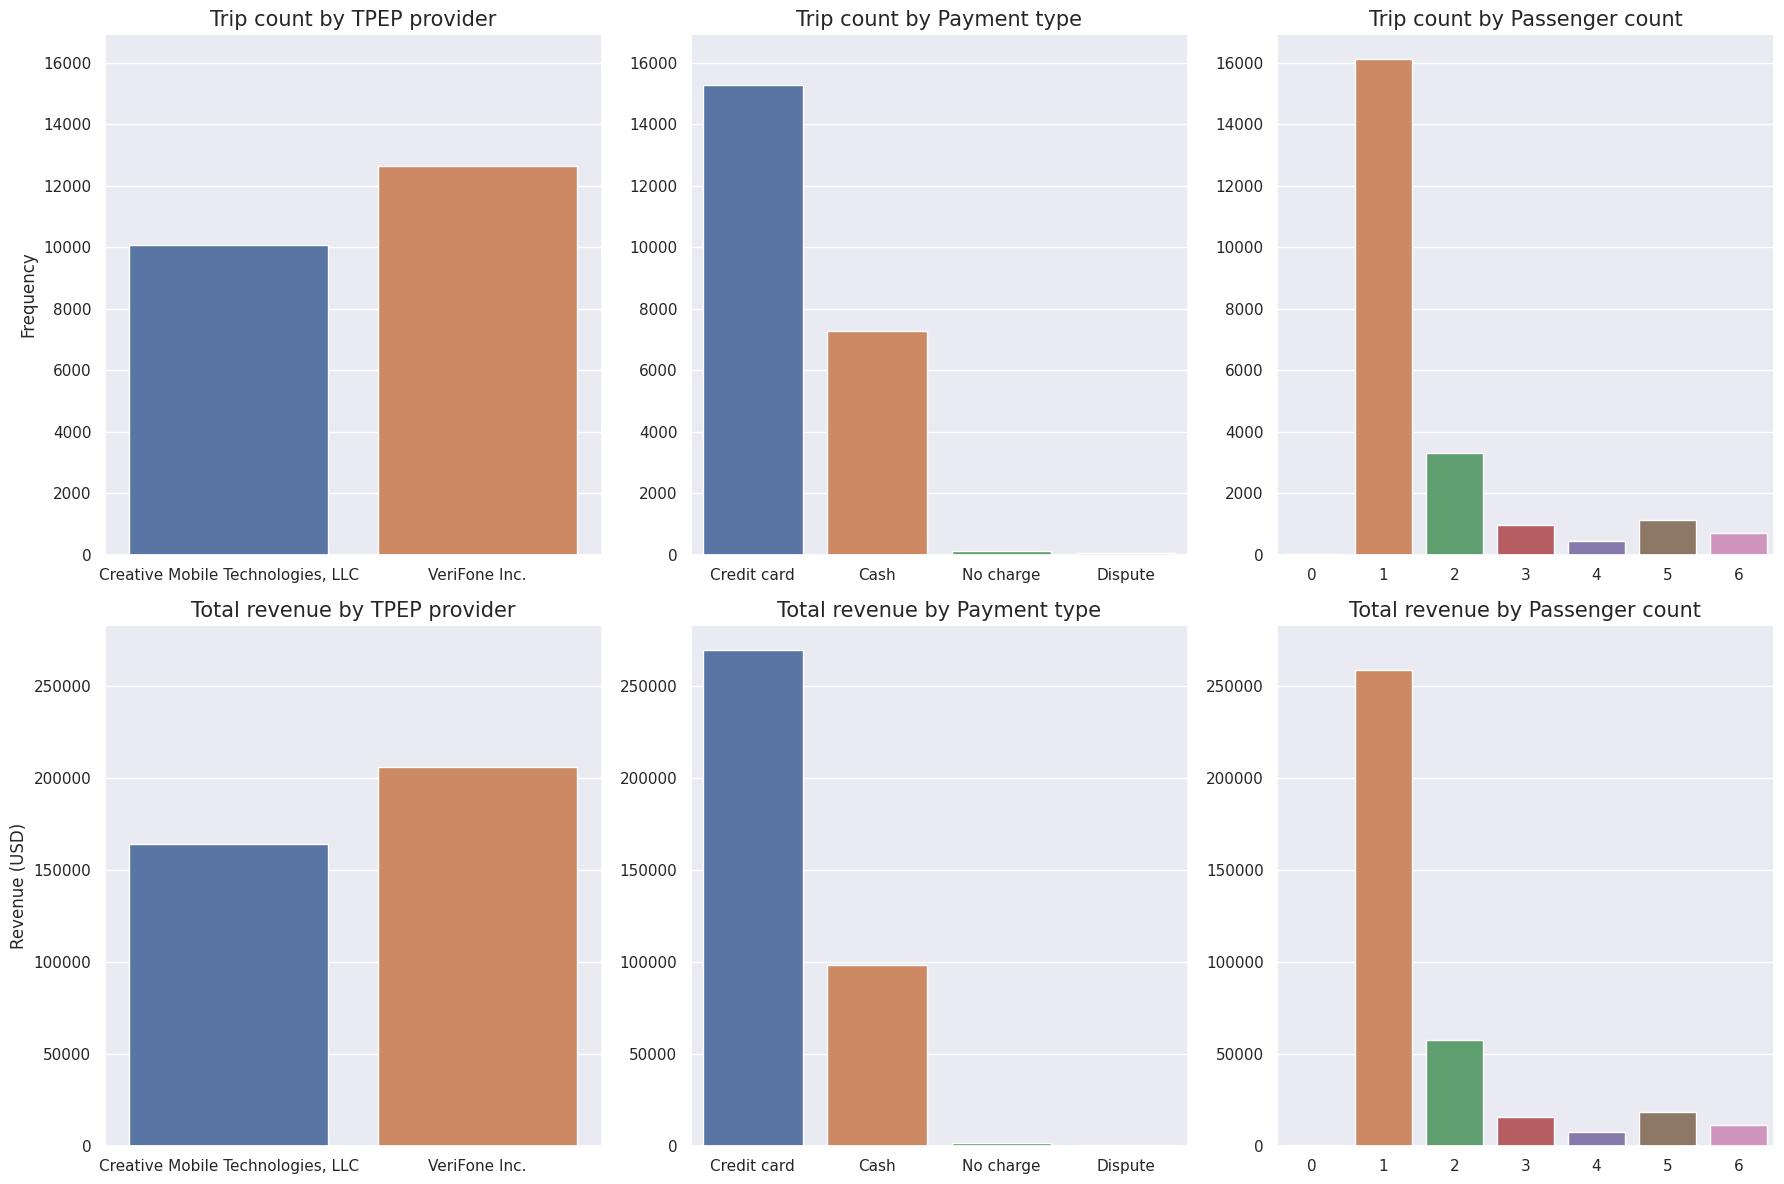

In [28]:
fig = plt.figure(figsize = (18, 12))
ax1 = plt.subplot2grid((2, 3),(0, 0))
ax2 = plt.subplot2grid((2, 3),(0, 1), sharey = ax1)
ax3 = plt.subplot2grid((2, 3),(0, 2), sharey = ax1)
ax4 = plt.subplot2grid((2, 3),(1, 0))
ax5 = plt.subplot2grid((2, 3),(1, 1), sharey = ax4)
ax6 = plt.subplot2grid((2, 3),(1, 2), sharey = ax4)

# vendor
vendor_id = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}

sns.countplot(data = df, x = 'VendorID', order = vendor_id.keys(), ax = ax1)
ax1.set_title('Trip count by TPEP provider', fontsize = 15)
ax1.set_xticks(ticks = range(len(vendor_id)), labels = vendor_id.values())
ax1.set_xlabel('')
ax1.set_ylabel('Frequency')

revenue_by_vendor = df.groupby(['VendorID'])['total_amount'].sum()
sns.barplot(x = revenue_by_vendor.index, y = revenue_by_vendor.values, ax = ax4)
ax4.set_title('Total revenue by TPEP provider', fontsize = 15)
ax4.set_xticks(ticks = range(len(vendor_id)), labels = vendor_id.values())
ax4.set_xlabel('')
ax4.set_ylabel('Revenue (USD)')

# payment type
payment_id = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}

sns.countplot(data = df, x = 'payment_type', order = payment_id.keys(), ax = ax2)
ax2.set_title('Trip count by Payment type', fontsize = 15)
ax2.set_xticks(ticks = range(len(payment_id)), labels = payment_id.values())
ax2.set_xlabel('')
ax2.set_ylabel('')

revenue_by_payment = df.groupby(['payment_type'])['total_amount'].sum()
sns.barplot(x = revenue_by_payment.index, y = revenue_by_payment.values, ax = ax5)
ax5.set_title('Total revenue by Payment type', fontsize = 15)
ax5.set_xticks(ticks = range(len(payment_id)), labels = payment_id.values())
ax5.set_xlabel('')
ax5.set_ylabel('')

# passenger count
sns.countplot(data = df, x = 'passenger_count', ax = ax3)
ax3.set_title('Trip count by Passenger count', fontsize = 15)
ax3.set_xlabel('')
ax3.set_ylabel('')

revenue_by_passenger = df.groupby(['passenger_count'])['total_amount'].sum()
sns.barplot(x = revenue_by_passenger.index, y = revenue_by_passenger.values, ax = ax6)
ax6.set_title('Total revenue by Passenger count', fontsize = 15)
ax6.set_xlabel('')
ax6.set_ylabel('')


fig.tight_layout()
plt.show();

## Trip count and revenue over time

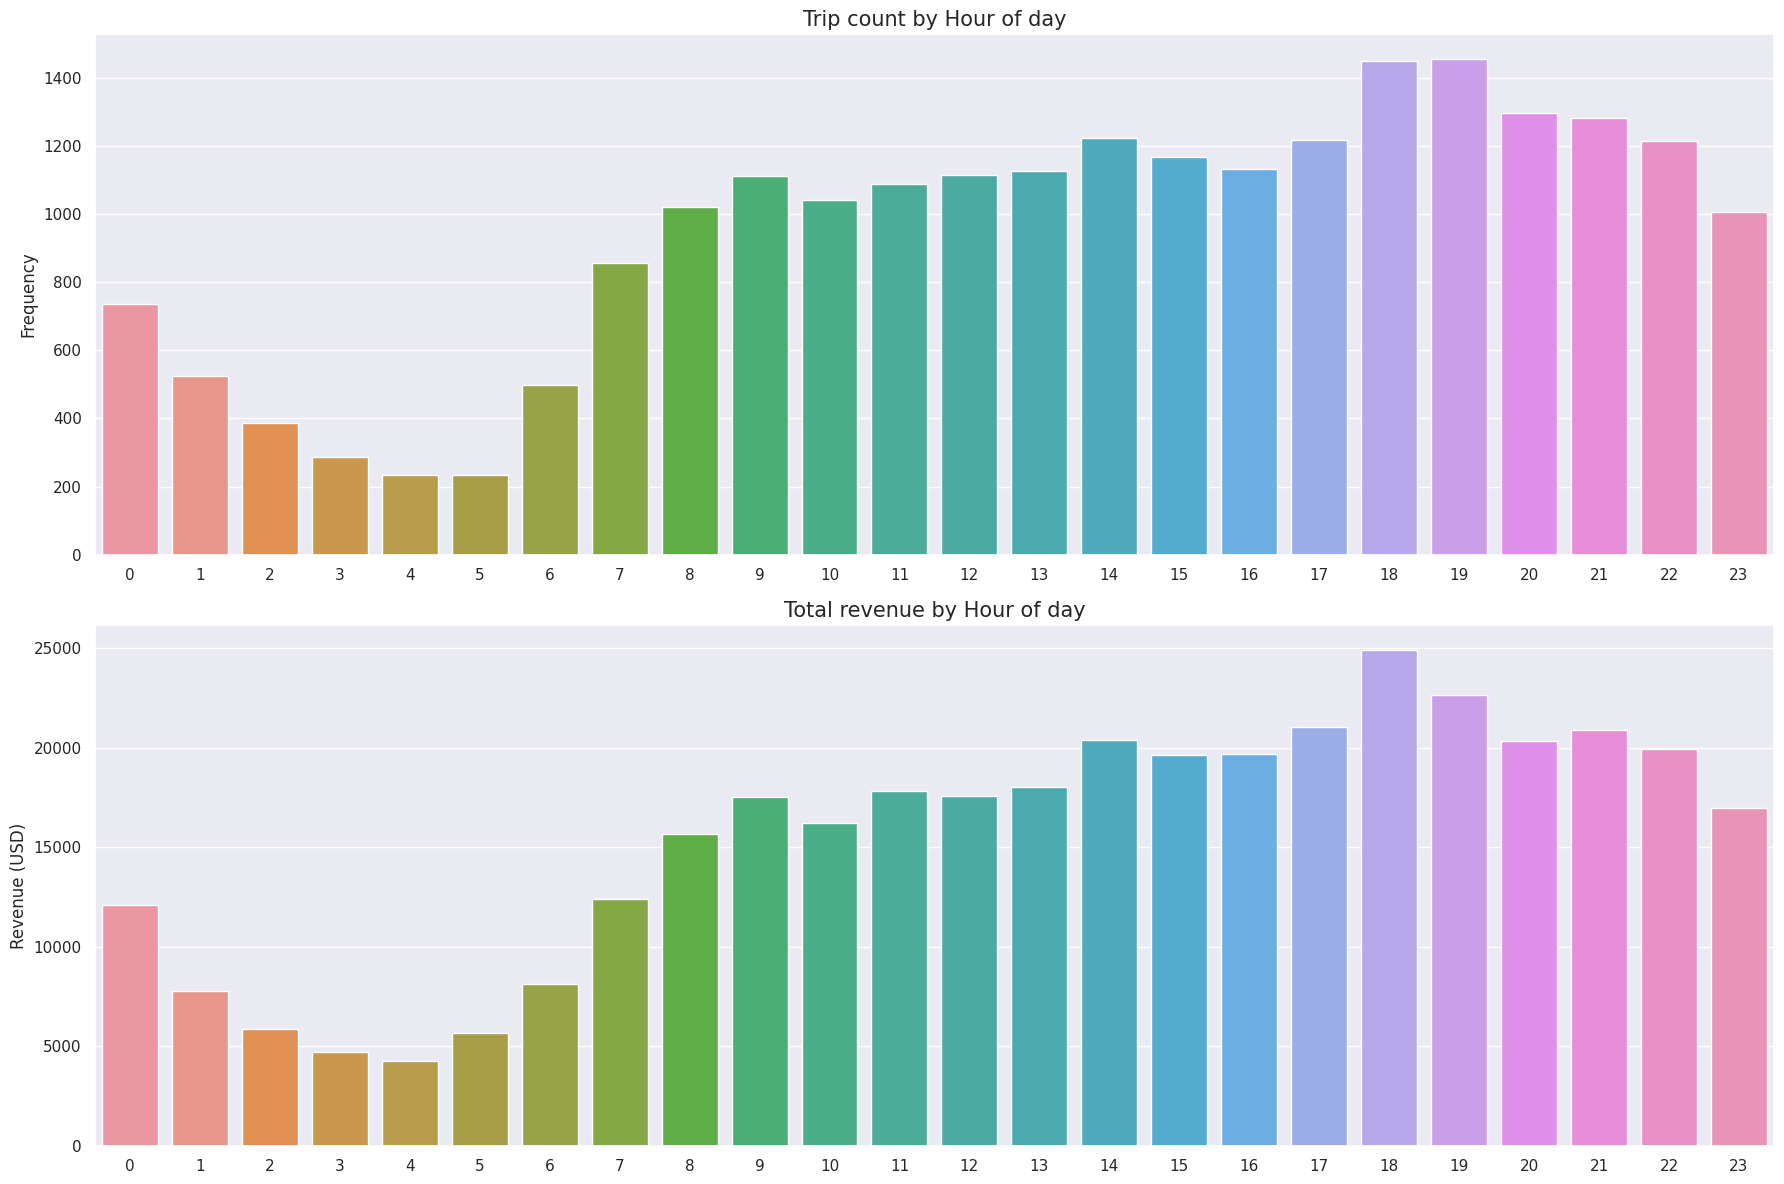

In [29]:
fig = plt.figure(figsize = (18, 12))
ax1 = plt.subplot2grid((2, 1),(0, 0))
ax2 = plt.subplot2grid((2, 1),(1, 0))

# hour of day
sns.countplot(data = df, x = 'hour', ax = ax1)
ax1.set_title('Trip count by Hour of day', fontsize = 15)
ax1.set_xlabel('')
ax1.set_ylabel('Frequency')

revenue_by_hour = df.groupby(['hour'])['total_amount'].sum()
sns.barplot(x = revenue_by_hour.index, y = revenue_by_hour.values, ax = ax2)
ax2.set_title('Total revenue by Hour of day', fontsize = 15)
ax2.set_xlabel('')
ax2.set_ylabel('Revenue (USD)')


fig.tight_layout()
plt.show();

In [30]:
day_order.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

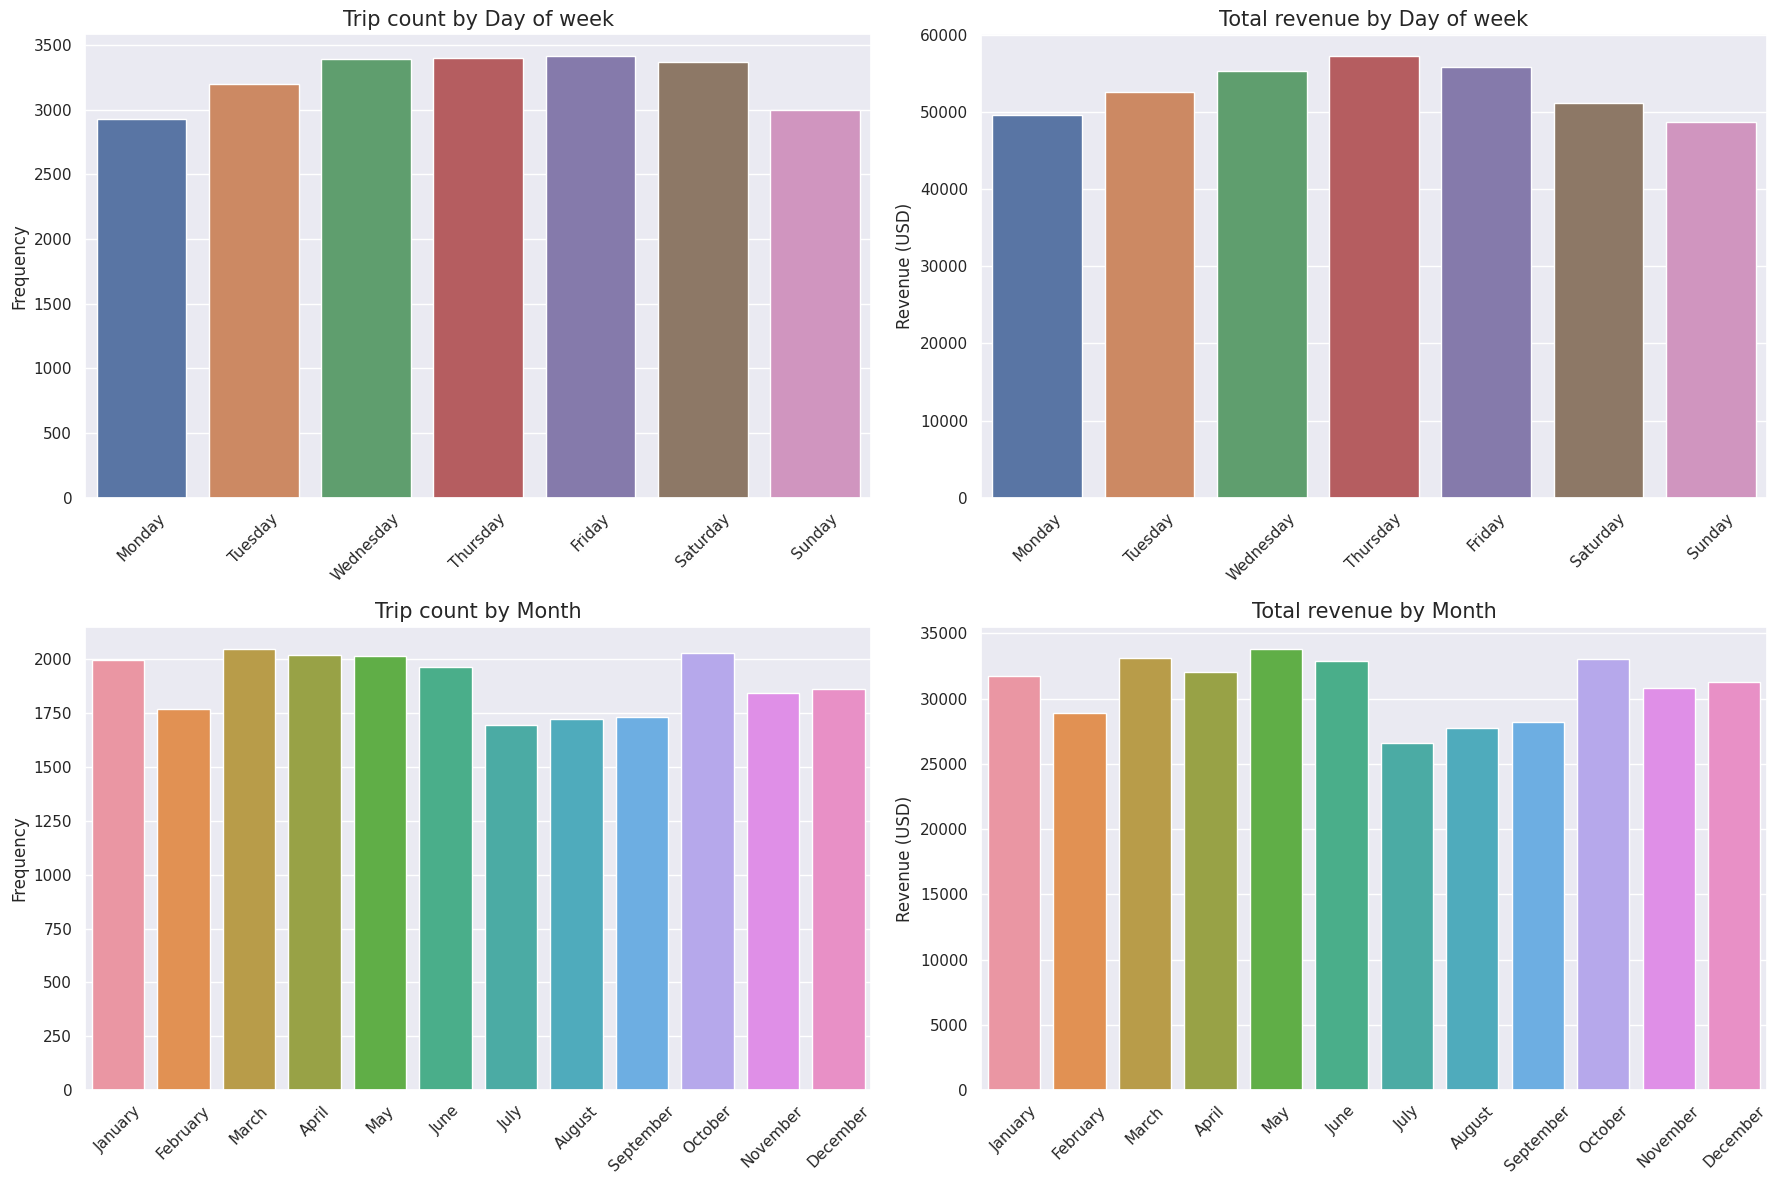

In [31]:
# create plots layout
fig = plt.figure(figsize = (18, 12))
ax1 = plt.subplot2grid((2, 2),(0, 0))
ax2 = plt.subplot2grid((2, 2),(0, 1))
ax3 = plt.subplot2grid((2, 2),(1, 0))
ax4 = plt.subplot2grid((2, 2),(1, 1))

# day of week
sns.countplot(data = df, x = 'day', ax = ax1)
ax1.set_title('Trip count by Day of week', fontsize = 15)
ax1.set_xlabel('')
ax1.set_xticklabels(day_order.values(), rotation = 45)
ax1.set_ylabel('Frequency')

revenue_by_day = df.groupby(['day'])['total_amount'].sum()
sns.barplot(x = revenue_by_day.index, y = revenue_by_day.values, ax = ax2)
ax2.set_title('Total revenue by Day of week', fontsize = 15)
ax2.set_xlabel('')
ax2.set_xticklabels(day_order.values(), rotation = 45)
ax2.set_ylabel('Revenue (USD)')

# month
sns.countplot(data = df, x = 'month', ax = ax3)
ax3.set_title('Trip count by Month', fontsize = 15)
ax3.set_xlabel('')
ax3.set_xticklabels(month_order.values(), rotation = 45)
ax3.set_ylabel('Frequency')

revenue_by_month = df.groupby(['month'])['total_amount'].sum()
sns.barplot(x = revenue_by_month.index, y = revenue_by_month.values, ax = ax4)
ax4.set_title('Total revenue by Month', fontsize = 15)
ax4.set_xlabel('')
ax4.set_xticklabels(month_order.values(), rotation = 45)
ax4.set_ylabel('Revenue (USD)')


fig.tight_layout()
plt.show();

## Credit card vs cash payment

In [32]:
filter_df = df[((df['payment_type'] == 1) | (df['payment_type'] == 2)) & (df['passenger_count'] != 0)].copy()
filter_df['payment'] = filter_df['payment_type'].map(payment_id)

filter_df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,PU_borough,PU_zone,hour,day,month,payment
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,Manhattan,Garment District,8,6,3,Credit card
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,Manhattan,Penn Station/Madison Sq West,14,2,4,Credit card
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,Manhattan,Yorkville East,7,5,12,Credit card
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,Brooklyn,Prospect-Lefferts Gardens,13,7,5,Credit card
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,Manhattan,Alphabet City,23,6,4,Cash


In [33]:
payment_color = {'Credit card': '#1f77b4', 'Cash': '#ff7f0e'}

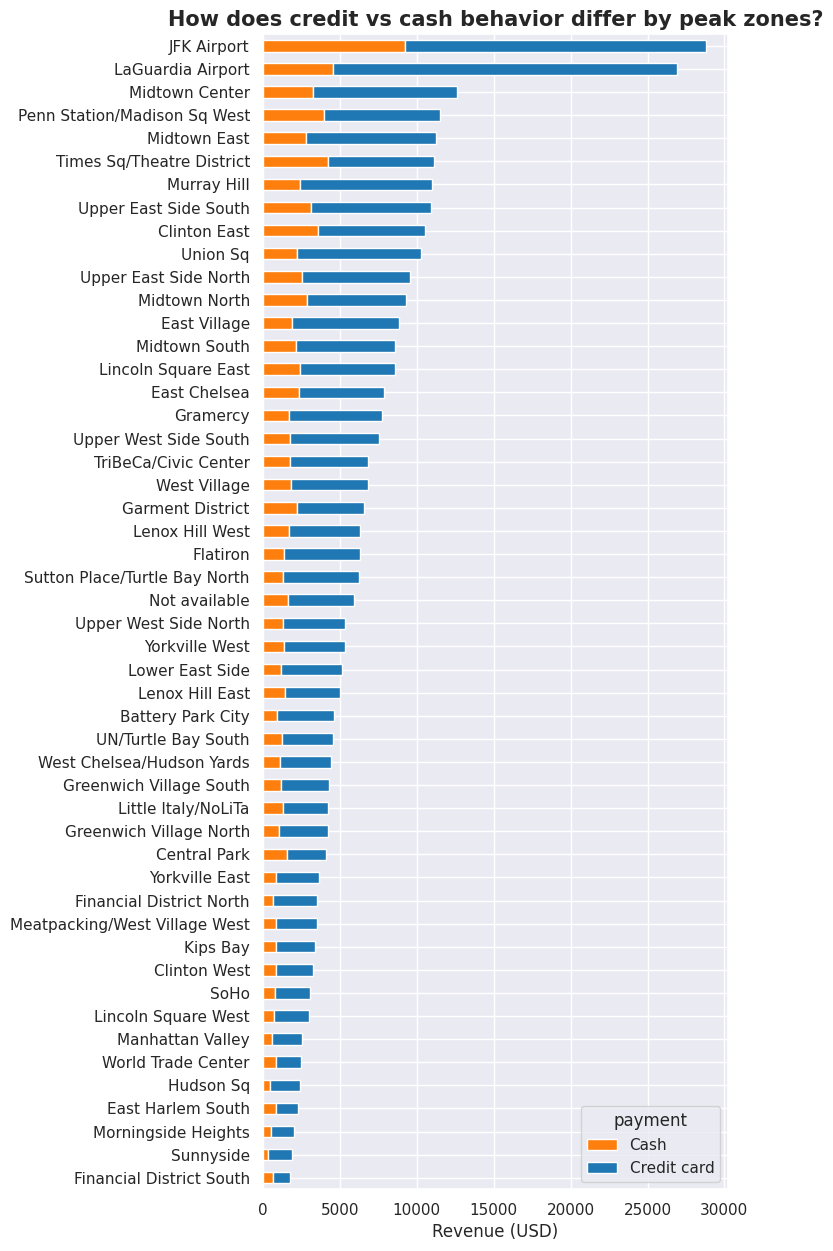

In [34]:
payment_location = filter_df.groupby(['PU_zone', 'payment'])['total_amount'].sum().unstack().fillna(0)
payment_location['total'] = payment_location.sum(axis = 1)
payment_by_location = payment_location.sort_values(by = 'total', ascending = False).drop(columns = 'total').head(50)

# plot
payment_by_location.iloc[::-1].plot(kind = 'barh', stacked = True, figsize = (6, 15), 
                              color = [payment_color[col] for col in payment_by_location.columns])
plt.title('How does credit vs cash behavior differ by peak zones?', fontsize = 15, fontweight = 'bold')
plt.xlabel('Revenue (USD)')
plt.ylabel('')
plt.savefig('payment_by_zone.png', dpi = 300, bbox_inches = 'tight');

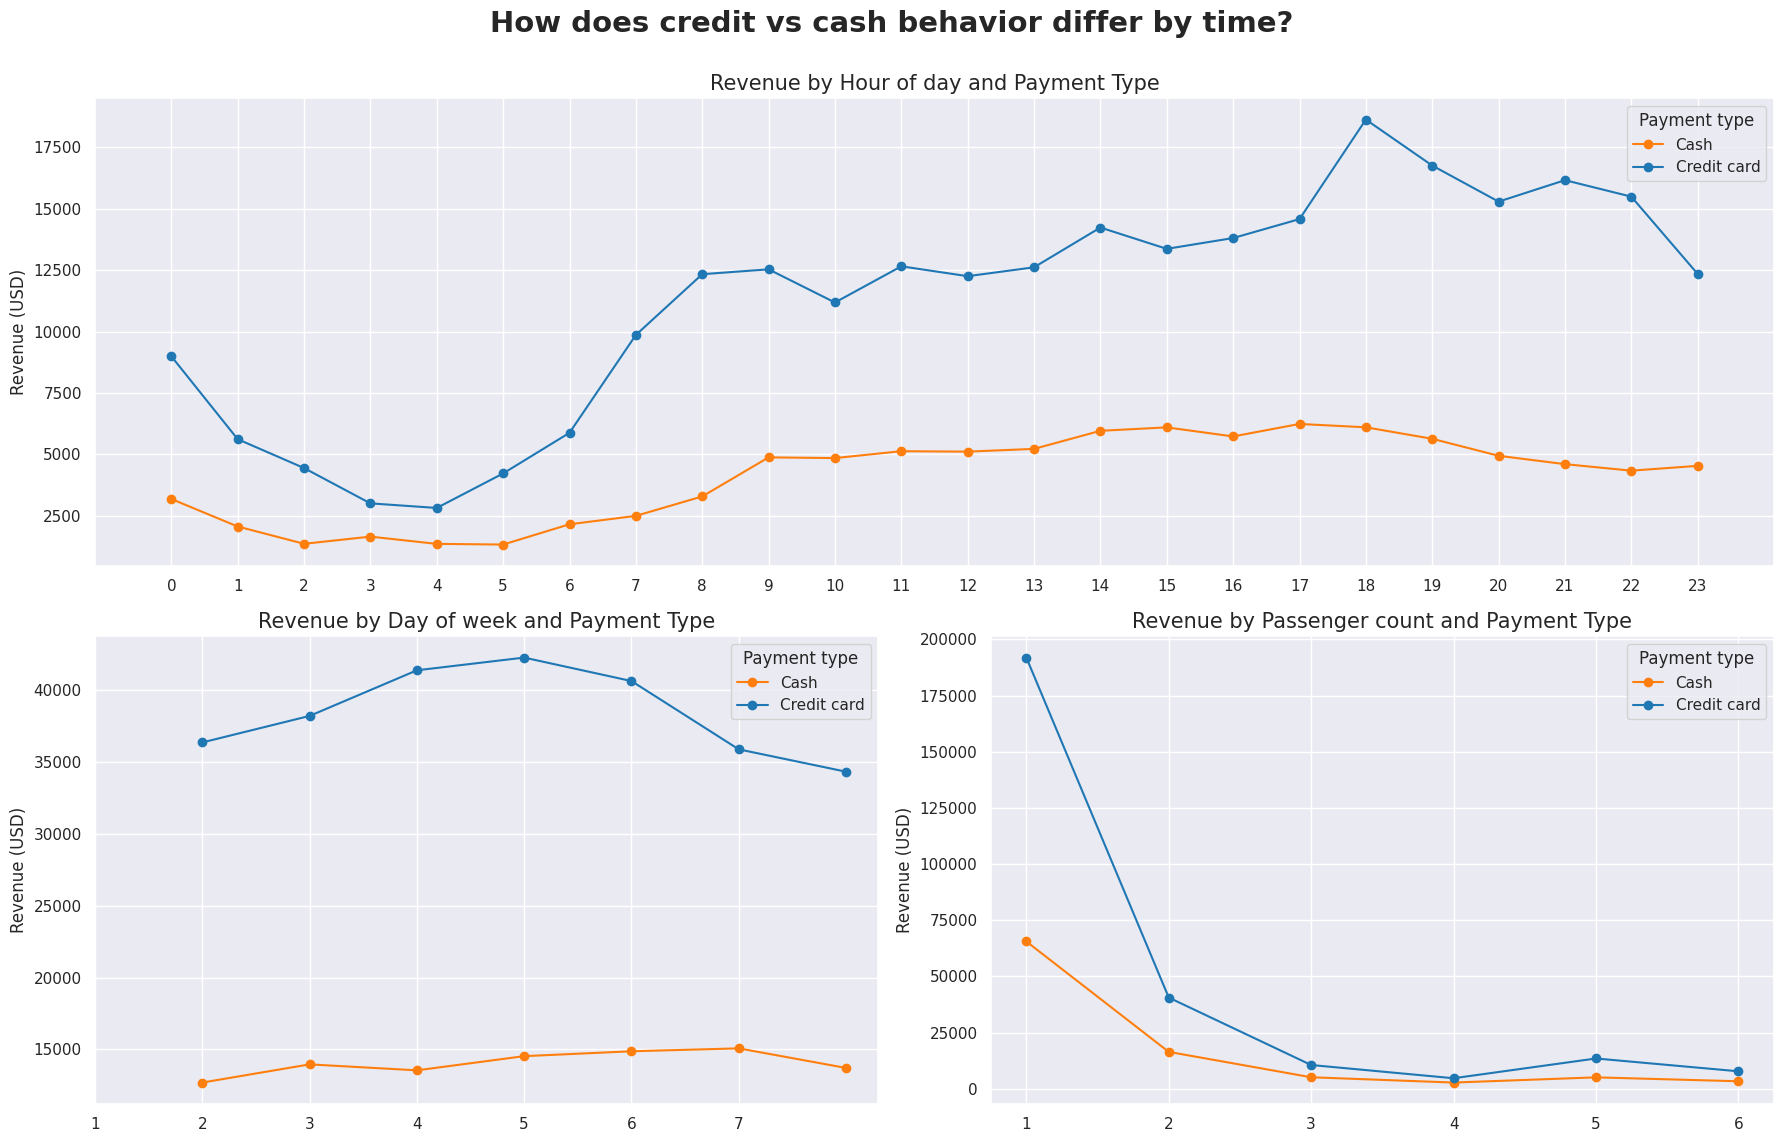

In [35]:
fig = plt.figure(figsize = (18, 12))
ax1 = plt.subplot2grid((2, 2),(0, 0), colspan = 2)
ax2 = plt.subplot2grid((2, 2),(1, 0))
ax3 = plt.subplot2grid((2, 2),(1, 1))

# payment by hour
payment_by_hour = filter_df.groupby(['hour', 'payment'])['total_amount'].sum().unstack()
payment_by_hour.plot(kind = 'line', marker = 'o', color = [payment_color[col] for col in payment_by_hour.columns], ax = ax1)
ax1.set_xticks(range(len(payment_by_hour)))
ax1.set_title('Revenue by Hour of day and Payment Type', fontsize = 15)
ax1.set_xlabel('')
ax1.set_ylabel('Revenue (USD)')
ax1.legend(title = 'Payment type')

# payment by day
payment_by_day = filter_df.groupby(['day', 'payment'])['total_amount'].sum().unstack()
payment_by_day = payment_by_day.reindex(day_order)
payment_by_day.plot(kind = 'line', marker = 'o', color = [payment_color[col] for col in payment_by_day.columns], ax = ax2)
ax2.set_xticks(range(len(payment_by_day)))
ax2.set_xticklabels(day_order, rotation = 0)
ax2.set_title('Revenue by Day of week and Payment Type', fontsize = 15)
ax2.set_xlabel('')
ax2.set_ylabel('Revenue (USD)')
ax2.legend(title = 'Payment type')

# payment by passenger
payment_by_passenger = filter_df.groupby(['passenger_count', 'payment'])['total_amount'].sum().unstack()
payment_by_passenger.plot(kind = 'line', marker = 'o', color = [payment_color[col] for col in payment_by_passenger.columns], ax = ax3)
ax3.set_title('Revenue by Passenger count and Payment Type', fontsize = 15)
ax3.set_xlabel('')
ax3.set_ylabel('Revenue (USD)')
ax3.legend(title = 'Payment type')


plt.suptitle('How does credit vs cash behavior differ by time?', fontsize = 21, fontweight = 'bold')
fig.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.savefig('payment_by_time.png', dpi = 300, bbox_inches = 'tight');

## Tipping behaviour (credit card)

In [36]:
cc_df = df[(df['payment_type'] == 1) & (df['passenger_count'] != 0)].copy()

cc_df['tip_percent'] = round(cc_df['tip_amount'] / (cc_df['total_amount'] - cc_df['tip_amount']), 3)

In [37]:
features = ['VendorID', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'hour', 'day']

correlation = cc_df[features + ['tip_percent']].corr()['tip_percent'].drop('tip_percent')

labels = {'VendorID': 'TPEP provider', 
          'passenger_count': 'Number of Passengers',
          'trip_distance': 'Trip Distance (miles)',
          'PULocationID': 'Pick-up Zone',
          'DOLocationID': 'Dropoff Zone',
          'fare_amount': 'Fare (USD)',
          'hour': 'Hour of Day',
          'day_number': 'Day of Week'}

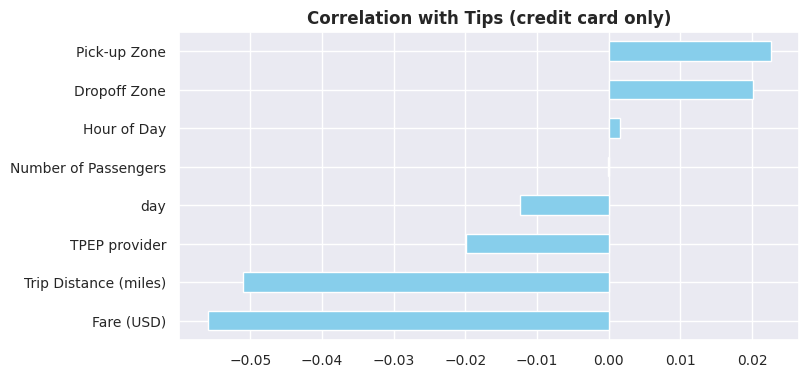

In [38]:
ax = correlation.rename(index = labels).sort_values().plot(kind = 'barh', color = 'skyblue', figsize = (8, 4))
ax.set_title('Correlation with Tips (credit card only)', fontsize = 12, fontweight = 'bold')
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
plt.savefig('tips_correlation.png', dpi = 300, bbox_inches = 'tight');

In [39]:
fig = plt.figure(figsize = (18, 18))
ax1 = plt.subplot2grid((3, 2),(0, 0), rowspan = 3)
ax2 = plt.subplot2grid((3, 2),(0, 1))
ax3 = plt.subplot2grid((3, 2),(1, 1))
ax4 = plt.subplot2grid((3, 2),(2, 1))

# peak zones
sns.barplot(data = top_trips, x = 'trip_count', y = 'PU_zone', hue = 'PU_borough', dodge = False, palette = borough_color, ax = ax1)
ax1.set_title('Top 50 pick-up zones', fontsize = 15)
ax1.set_xlabel('Trip count')
ax1.set_ylabel('')
ax1.legend(title = '')

# hour of day
sns.countplot(data = df, x = 'hour', ax = ax2)
ax2.set_title('Trip count by Hour of day', fontsize = 15)
ax2.set_xlabel('')
ax2.set_ylabel('Frequency')

# day of week
sns.countplot(data = df, x = 'day', ax = ax3)
ax3.set_title('Trip count by Day of week', fontsize = 15)
ax3.set_xlabel('')
ax3.set_xticklabels(day_order.values(), rotation = 45)
ax3.set_ylabel('Frequency')

# month
sns.countplot(data = df, x = 'month', ax = ax4)
ax4.set_title('Trip count by Month', fontsize = 15)
ax4.set_xlabel('')
ax4.set_xticklabels(month_order.values(), rotation = 45)
ax4.set_ylabel('Frequency')


plt.suptitle('When and where are peak trips?', fontsize = 18, fontweight = 'bold')
fig.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.savefig('peak_trips.png', dpi = 300, bbox_inches = 'tight')
plt.close();

In [40]:
fig = plt.figure(figsize = (18, 18))
ax1 = plt.subplot2grid((3, 2),(0, 0), rowspan = 3)
ax2 = plt.subplot2grid((3, 2),(0, 1))
ax3 = plt.subplot2grid((3, 2),(1, 1))
ax4 = plt.subplot2grid((3, 2),(2, 1))

# top revenue by zone
sns.barplot(data = top_revenue, x = 'total_revenue', y = 'PU_zone', hue = 'PU_borough', dodge = False, palette = borough_color, ax = ax1)
ax1.set_title('Top 50 pick-up zones by Total Revenue', fontsize = 15)
ax1.set_xlabel('Revenue (USD)')
ax1.set_ylabel('')
ax1.legend(title = '')

# hour of day
revenue_by_hour = df.groupby(['hour'])['total_amount'].sum()
sns.barplot(x = revenue_by_hour.index, y = revenue_by_hour.values, ax = ax2)
ax2.set_title('Total revenue by Hour of day', fontsize = 15)
ax2.set_xlabel('')
ax2.set_ylabel('Revenue (USD)')

# day of week
revenue_by_day = df.groupby(['day'])['total_amount'].sum()
sns.barplot(x = revenue_by_day.index, y = revenue_by_day.values, ax = ax3)
ax3.set_title('Total revenue by Day of week', fontsize = 15)
ax3.set_xlabel('')
ax3.set_xticklabels(day_order.values(), rotation = 45)
ax3.set_ylabel('Revenue (USD)')

# month
revenue_by_month = df.groupby(['month'])['total_amount'].sum()
sns.barplot(x = revenue_by_month.index, y = revenue_by_month.values, ax = ax4)
ax4.set_title('Total revenue by Month', fontsize = 15)
ax4.set_xlabel('')
ax4.set_xticklabels(month_order.values(), rotation = 45)
ax4.set_ylabel('Revenue (USD)')


plt.suptitle('When and where generate the highest revenue?', fontsize = 18, fontweight = 'bold')
fig.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.savefig('high_revenue.png', dpi = 300, bbox_inches = 'tight')
plt.close();